<a href="https://colab.research.google.com/github/seema329/EDA/blob/main/Copy_of_Numerical_Programming_in_Python_Analyze_it_Yourself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






#Install Necessary Packages

In [ ]:
#Install Necessary Packages
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
!pip install bs4

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [633 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,282 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:13 http://security.ubuntu.

# Import Necessary Module

In [ ]:
#Import Necessary Modules for Scraping
import requests
from bs4 import BeautifulSoup

#Import Necessary datetime module
from datetime import datetime
import pytz
import time

#Import Necessary Module to interact with page
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

# Chrome options setup

In [ ]:
#Set up of Chrome options
options = Options()
options.add_argument("--no-sandbox")
options.add_argument("--headless=new")

options.headless = True

# Generalize the form of URL and Scraping data

In [ ]:
def get_url(position, location):
  #form URL structure and return
    source = 'https://www.linkedin.com/jobs/search?keywords={}&location={}&geoId=&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0'
    url = source.format(position, location)
    return url

def get_data(div, link):
  #General form of scrape the data
    job_link = link.get('href')
    job_title = div.h3.text.strip()
    try:
      company_name = div.find('a', 'hidden-nested-link').text.strip()
    except AttributeError:
      company_name = ''
    job_location = div.find('span', 'job-search-card__location').text.strip()

    try:
        salary_element = div.find('span', 'job-search-card__salary-info').text.replace('\n', '').strip()
        job_salary = ''.join(salary_element.split())
    except AttributeError:
        job_salary = 'Salary information is not available'

    try:
        status = div.find('span', 'result-benefits__text').text.strip()
    except AttributeError:
        status = 'Not updated'

    post_date = div.find('time').get('datetime')

    local_tm = pytz.timezone('Asia/Kolkata')
    today = datetime.now(local_tm).strftime('%Y-%m-%d')

    record = (job_title, company_name, job_location, job_link, job_salary, status, post_date, today)
    return record

# Selenium to scroll page and scrape with BeautifulSoup

In [ ]:
def main():
    URL = get_url('Data Science jobs', 'India')
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36 Edg/116.0.1938.62'}

    # Initialize driver
    driver = webdriver.Chrome(options=options)
    driver.get(URL)

    # Scroll down the page to get maximum data
    scroll_pause_time = 10
    last_height = driver.execute_script("return document.body.scrollHeight")

    records = []

    try:
        while True:
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(scroll_pause_time)
            new_height = driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height
    except:
        pass

    # Passsing the page_source with 'html.parser' in BeautifulSoup
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, "html.parser")

    divs = soup.find_all('div', 'base-search-card__info')
    all_job_link = soup.find_all('a', class_='base-card__full-link')

    for item1, item2 in zip(divs, all_job_link):
        records.append(get_data(item1, item2))

    driver.quit()

    # print the total records
    print(len(records), "jobs scraped.")

    return records


# Scrape the data and Process the Data

In [ ]:
# Now process the records as needed, e.g., write to CSV
import csv

# Get the records
if __name__ == '__main__':
  records = main()
  # csv file path
  csv_file_path = 'linkedin_job_records.csv'

  # Column names
  column_names = ['Job Title', 'Company', 'Location', 'Link', 'Salary', 'Status', 'Post Date', 'Today Date']

  # Write records to CSV file
  with open(csv_file_path, 'w', newline='', encoding='utf-8') as csvfile:
      writer = csv.writer(csvfile)
      writer.writerow(column_names)
      writer.writerows(records)

  print(f"CSV file '{csv_file_path}' created successfully.")


175 jobs scraped.
CSV file 'linkedin_job_records.csv' created successfully.


# Analyzing the Data using libraries

In [ ]:
import pandas as pd
import numpy as np


# Read the csv file into Dataframe
linkedin_df = pd.read_csv('/content/linkedin_job_records.csv')

# Display the first few rows of the DataFrame
linkedin_df.head()

,Job Title,Company,Location,Link,Salary,Status,Post Date,Today Date
0,Junior Data Scientist,Tecvesten Consulting,"Chennai, Tamil Nadu, India",https://in.linkedin.com/jobs/view/junior-data-...,Salary information is not available,Not updated,2023-12-08,2023-12-08
1,Data Analyst - R/Python,Xpressbees (BusyBees Logistics Solutions Pvt. ...,"Pune, Maharashtra, India",https://in.linkedin.com/jobs/view/data-analyst...,Salary information is not available,Actively Hiring,2023-11-01,2023-12-08
2,Data Scientist,ICICIdirect,"Navi Mumbai, Maharashtra, India",https://in.linkedin.com/jobs/view/data-scienti...,Salary information is not available,Actively Hiring,2023-12-08,2023-12-08
3,Artificial Intelligence (AI),Binford Research Labs,"Hyderabad, Telangana, India",https://in.linkedin.com/jobs/view/artificial-i...,Salary information is not available,Actively Hiring,2023-12-07,2023-12-08
4,Data Research Analyst,Forbes Advisor,"Mumbai, Maharashtra, India",https://in.linkedin.com/jobs/view/data-researc...,Salary information is not available,Not updated,2023-11-22,2023-12-08


# Analysis of data

In [ ]:
linkedin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Job Title   175 non-null    object
 1   Company     175 non-null    object
 2   Location    175 non-null    object
 3   Link        175 non-null    object
 4   Salary      175 non-null    object
 5   Status      175 non-null    object
 6   Post Date   175 non-null    object
 7   Today Date  175 non-null    object
dtypes: object(8)
memory usage: 11.1+ KB


Data Cleaning

In [ ]:
# drop unnecessary columns
linkedin_df.drop(['Link', 'Status'], axis= 1)

,Job Title,Company,Location,Salary,Post Date,Today Date
0,Junior Data Scientist,Tecvesten Consulting,"Chennai, Tamil Nadu, India",Salary information is not available,2023-12-08,2023-12-08
1,Data Analyst - R/Python,Xpressbees (BusyBees Logistics Solutions Pvt. ...,"Pune, Maharashtra, India",Salary information is not available,2023-11-01,2023-12-08
2,Data Scientist,ICICIdirect,"Navi Mumbai, Maharashtra, India",Salary information is not available,2023-12-08,2023-12-08
3,Artificial Intelligence (AI),Binford Research Labs,"Hyderabad, Telangana, India",Salary information is not available,2023-12-07,2023-12-08
4,Data Research Analyst,Forbes Advisor,"Mumbai, Maharashtra, India",Salary information is not available,2023-11-22,2023-12-08
...,...,...,...,...,...,...
170,Machine Learning Engineer,NeuralSpace,"Bengaluru, Karnataka, India",Salary information is not available,2023-08-03,2023-12-08
171,Business Analyst (Fresher),Wizikey,"Gurugram, Haryana, India",Salary information is not available,2023-12-06,2023-12-08
172,ML Engineer,Fulcrum Digital Inc,"Mumbai, Maharashtra, India",Salary information is not available,2023-12-01,2023-12-08
173,AI Scientist,Intangles,"Pune, Maharashtra, India",Salary information is not available,2023-12-05,2023-12-08


In [ ]:
#drop null values
column_cleaned = linkedin_df.dropna(subset=['Job Title', 'Company', 'Location'])

In [ ]:
# Replace 'Salary information is not available' with NaN
column_cleaned['Salary'] = column_cleaned['Salary'].replace('Salary information is not available', np.nan)

In [ ]:
column_cleaned['Salary'].value_counts

<bound method IndexOpsMixin.value_counts of 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
170   NaN
171   NaN
172   NaN
173   NaN
174   NaN
Name: Salary, Length: 175, dtype: float64>

In [ ]:
column_cleaned['Salary'].isnull().sum()

165

In [ ]:
column_cleaned['Salary'] = column_cleaned['Salary'].replace('NaN', 0)

In [ ]:
column_cleaned['Salary'].value_counts()

4.000005e+11    6
3.000000e+03    1
3.250065e+09    1
3.000005e+11    1
1.000000e+13    1
Name: Salary, dtype: int64

In [ ]:
# Convert 'Post Date' and 'Today Date' to datetime objects
column_cleaned['Post Date'] = pd.to_datetime(column_cleaned['Post Date'])
column_cleaned['Today Date'] = pd.to_datetime(column_cleaned['Today Date'])

In [ ]:
# Adding a extra column Job Age
column_cleaned['Job Age'] = (column_cleaned['Today Date'] - column_cleaned['Post Date']).dt.days

In [ ]:
# Extract year and month from 'Post Date'
column_cleaned['Post Year'] = column_cleaned['Post Date'].dt.year
column_cleaned['Post Month'] = column_cleaned['Post Date'].dt.month

# Summary of data cleaned

1) Dropped null values in columns- 'Job Title', 'Company', 'Location' column names as column_cleaned.

2) Replace 'Salary information is not available' with NaN but the value are around 165 then we replace the NaN with 0.

3) Converted 'Post Date' and 'Today Date' to datetime object.

4) Get the job age by subtracting today date and post date.

5) Extract year and month from 'Post Date'.

6) Dropped column -'Link' and 'Status'.

# Analyzing Data

In [ ]:
column_cleaned.describe

<bound method NDFrame.describe of                               Job Title  \
0                 Junior Data Scientist   
1               Data Analyst - R/Python   
2                        Data Scientist   
3          Artificial Intelligence (AI)   
4                 Data Research Analyst   
..                                  ...   
170           Machine Learning Engineer   
171          Business Analyst (Fresher)   
172                         ML Engineer   
173                        AI Scientist   
174  Associate-Healthcare Data Research   

                                               Company  \
0                                 Tecvesten Consulting   
1    Xpressbees (BusyBees Logistics Solutions Pvt. ...   
2                                          ICICIdirect   
3                                Binford Research Labs   
4                                       Forbes Advisor   
..                                                 ...   
170                                        

In [ ]:
# Average salary
Average_Salary= column_cleaned['Salary'].mean()
print('\n Average Salary:')
print(Average_Salary)


 Average Salary:
1270325576800.0


In [ ]:
# job value count by location
Job_count=column_cleaned['Location'].value_counts()
print(Job_count)

Bengaluru, Karnataka, India          44
Mumbai, Maharashtra, India           20
Pune, Maharashtra, India             16
Hyderabad, Telangana, India          15
Bangalore Urban, Karnataka, India    14
India                                13
Chennai, Tamil Nadu, India           10
Gurugram, Haryana, India              4
Kochi, Kerala, India                  4
Lucknow, Uttar Pradesh, India         4
Delhi, India                          3
Noida, Uttar Pradesh, India           3
Panaji, Goa, India                    3
Bengaluru North, Karnataka, India     3
Gwalior, Madhya Pradesh, India        2
Coimbatore, Tamil Nadu, India         2
Pune/Pimpri-Chinchwad Area            2
Gurgaon, Haryana, India               2
Jamshedpur, Jharkhand, India          1
New Delhi, Delhi, India               1
Nagpur, Maharashtra, India            1
Thiruvananthapuram, Kerala, India     1
Mumbai Metropolitan Region            1
Jaipur, Rajasthan, India              1
Ahmedabad, Gujarat, India             1


In [ ]:
# Calculate average salary for each job title
average_salary_by_title = column_cleaned.groupby('Job Title')['Salary'].mean()

highest_avg_salary = average_salary_by_title.dropna().max()
highest_avg_salary_job_title = average_salary_by_title.dropna().idxmax()

# Find the company name, location, and job age associated with the highest average salary
highest_avg_salary_info = column_cleaned[column_cleaned['Job Title'] == highest_avg_salary_job_title].iloc[0]
highest_avg_salary_company = highest_avg_salary_info['Company']
highest_avg_salary_location = highest_avg_salary_info['Location']
highest_avg_salary_job_age = highest_avg_salary_info['Job Age']

print(f"Highest Average Salary: {highest_avg_salary:.2f}")
print(f"Job Title with Highest Average Salary: {highest_avg_salary_job_title}")
print(f"Company Name: {highest_avg_salary_company}")
print(f"Location: {highest_avg_salary_location}")
print(f"Job Age: {highest_avg_salary_job_age} days")

Highest Average Salary: 10000002200000.00
Job Title with Highest Average Salary: Data Scientist
Company Name: ICICIdirect
Location: Navi Mumbai, Maharashtra, India
Job Age: 0 days


In [ ]:
# Calculate the frequency of each job title based on the "Post Date" column
job_title_frequencies = column_cleaned.groupby('Job Title')['Post Date'].count()

# Display the job titles with the most vacancies along with their company names and post dates (within 7 days)
print("\nThe job titles with the most vacancies along with their company names and post dates (within 7 days)")
top_job_titles = job_title_frequencies.sort_values(ascending=False).head(10).index
for job_title in top_job_titles:
    job_title_data = column_cleaned[column_cleaned['Job Title'] == job_title]
    recent_post_dates = job_title_data[job_title_data['Job Age'] <= 7]['Post Date']

    if not recent_post_dates.empty:
        print(f"Job Title: {job_title}")
        print(f"Company Name: {job_title_data.iloc[0]['Company']}")
        print("Post Dates (within 7 days):")
        print(recent_post_dates)
        print("\n")


The job titles with the most vacancies along with their company names and post dates (within 7 days)
Job Title: Data Scientist
Company Name: ICICIdirect
Post Dates (within 7 days):
2    2023-12-08
24   2023-12-07
49   2023-12-06
95   2023-12-07
Name: Post Date, dtype: datetime64[ns]


Job Title: ML Engineer
Company Name: Predera
Post Dates (within 7 days):
9     2023-12-05
34    2023-12-07
92    2023-12-07
93    2023-12-01
157   2023-12-05
172   2023-12-01
Name: Post Date, dtype: datetime64[ns]


Job Title: Data Science- GPT/LLM
Company Name: LTIMindtree
Post Dates (within 7 days):
149   2023-12-06
156   2023-12-06
Name: Post Date, dtype: datetime64[ns]


Job Title: Data Analyst
Company Name: Paisabazaar
Post Dates (within 7 days):
125   2023-12-05
143   2023-12-08
155   2023-12-08
Name: Post Date, dtype: datetime64[ns]


Job Title: Machine Learning Engineer
Company Name: Topia Lifesciences
Post Dates (within 7 days):
65    2023-12-08
131   2023-12-04
Name: Post Date, dtype: datetime6

In [ ]:
# Sort the DataFrame in ascending order of 'Job Age'
most_recently_updated_jobs = column_cleaned.sort_values(by='Job Age')

# Display the most recently updated jobs (top 10)
print("\nThe most recently updated jobs (top 10)")
most_recently_updated_jobs[['Job Title', 'Company', 'Location', 'Job Age']].head(10)


The most recently updated jobs (top 10)


,Job Title,Company,Location,Job Age
0,Junior Data Scientist,Tecvesten Consulting,"Chennai, Tamil Nadu, India",0
2,Data Scientist,ICICIdirect,"Navi Mumbai, Maharashtra, India",0
58,Trainee Engineer - M.Tech in Energy studies,SgurrEnergy,"Pune, Maharashtra, India",0
65,Machine Learning Engineer,Topia Lifesciences,"Ahmedabad, Gujarat, India",0
77,Data Scientist - Machine Learning,"Dubai Jobs, Gulf Jobs, Jobs in Dubai, Qatar, K...","Bangalore Urban, Karnataka, India",0
155,Data Analyst,Streamline,"Hyderabad, Telangana, India",0
100,Data Scientist - Business Intelligence,"Dubai Jobs, Gulf Jobs, Jobs in Dubai, Qatar, K...","Bangalore Urban, Karnataka, India",0
143,Data Analyst,Streamline,"Hyderabad, Telangana, India",0
14,Data Science(Manager Analytics),Qween Network LLP,"Saket, Delhi, India",0
32,Thoucentric - Data Scientist - Python/Python/N...,Thoucentric,"Bengaluru, Karnataka, India",1


# Summary of Data analysis
1) Average salary is 1270325576800.0

2) There are 175 rows and 11 column.

3) Count the jobs by its location, Benguluru (Karnatak) has highest number of jobs i.e 44.

4) Found out the company name, location, and job age associated with the highest average salary.

5) Found out the most recently updated jobs (top 10).

# Visualization charts using the matplotlib and seaborn libraries based on analysis

In [ ]:
# Install and Import Necessary libraries
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

Job count by location

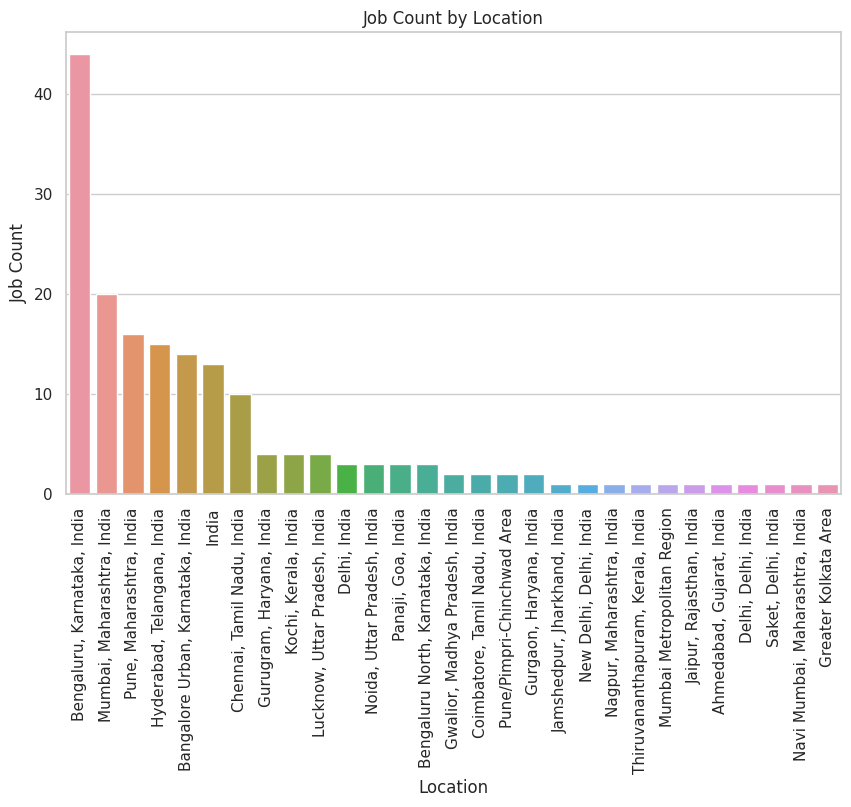

In [ ]:
# Create a bar chart for job count by location
plt.figure(figsize=(10, 6))
sns.barplot(x=Job_count.index, y=Job_count.values)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Job Count')
plt.title('Job Count by Location')
plt.show()

**CHART TYPE**:- Bar Chart

**INSIGHT:-**
Bengaluru (Karnatak) has highest number of jobs while Mumbai (Maharashtra) placed at second number of jobs provider.

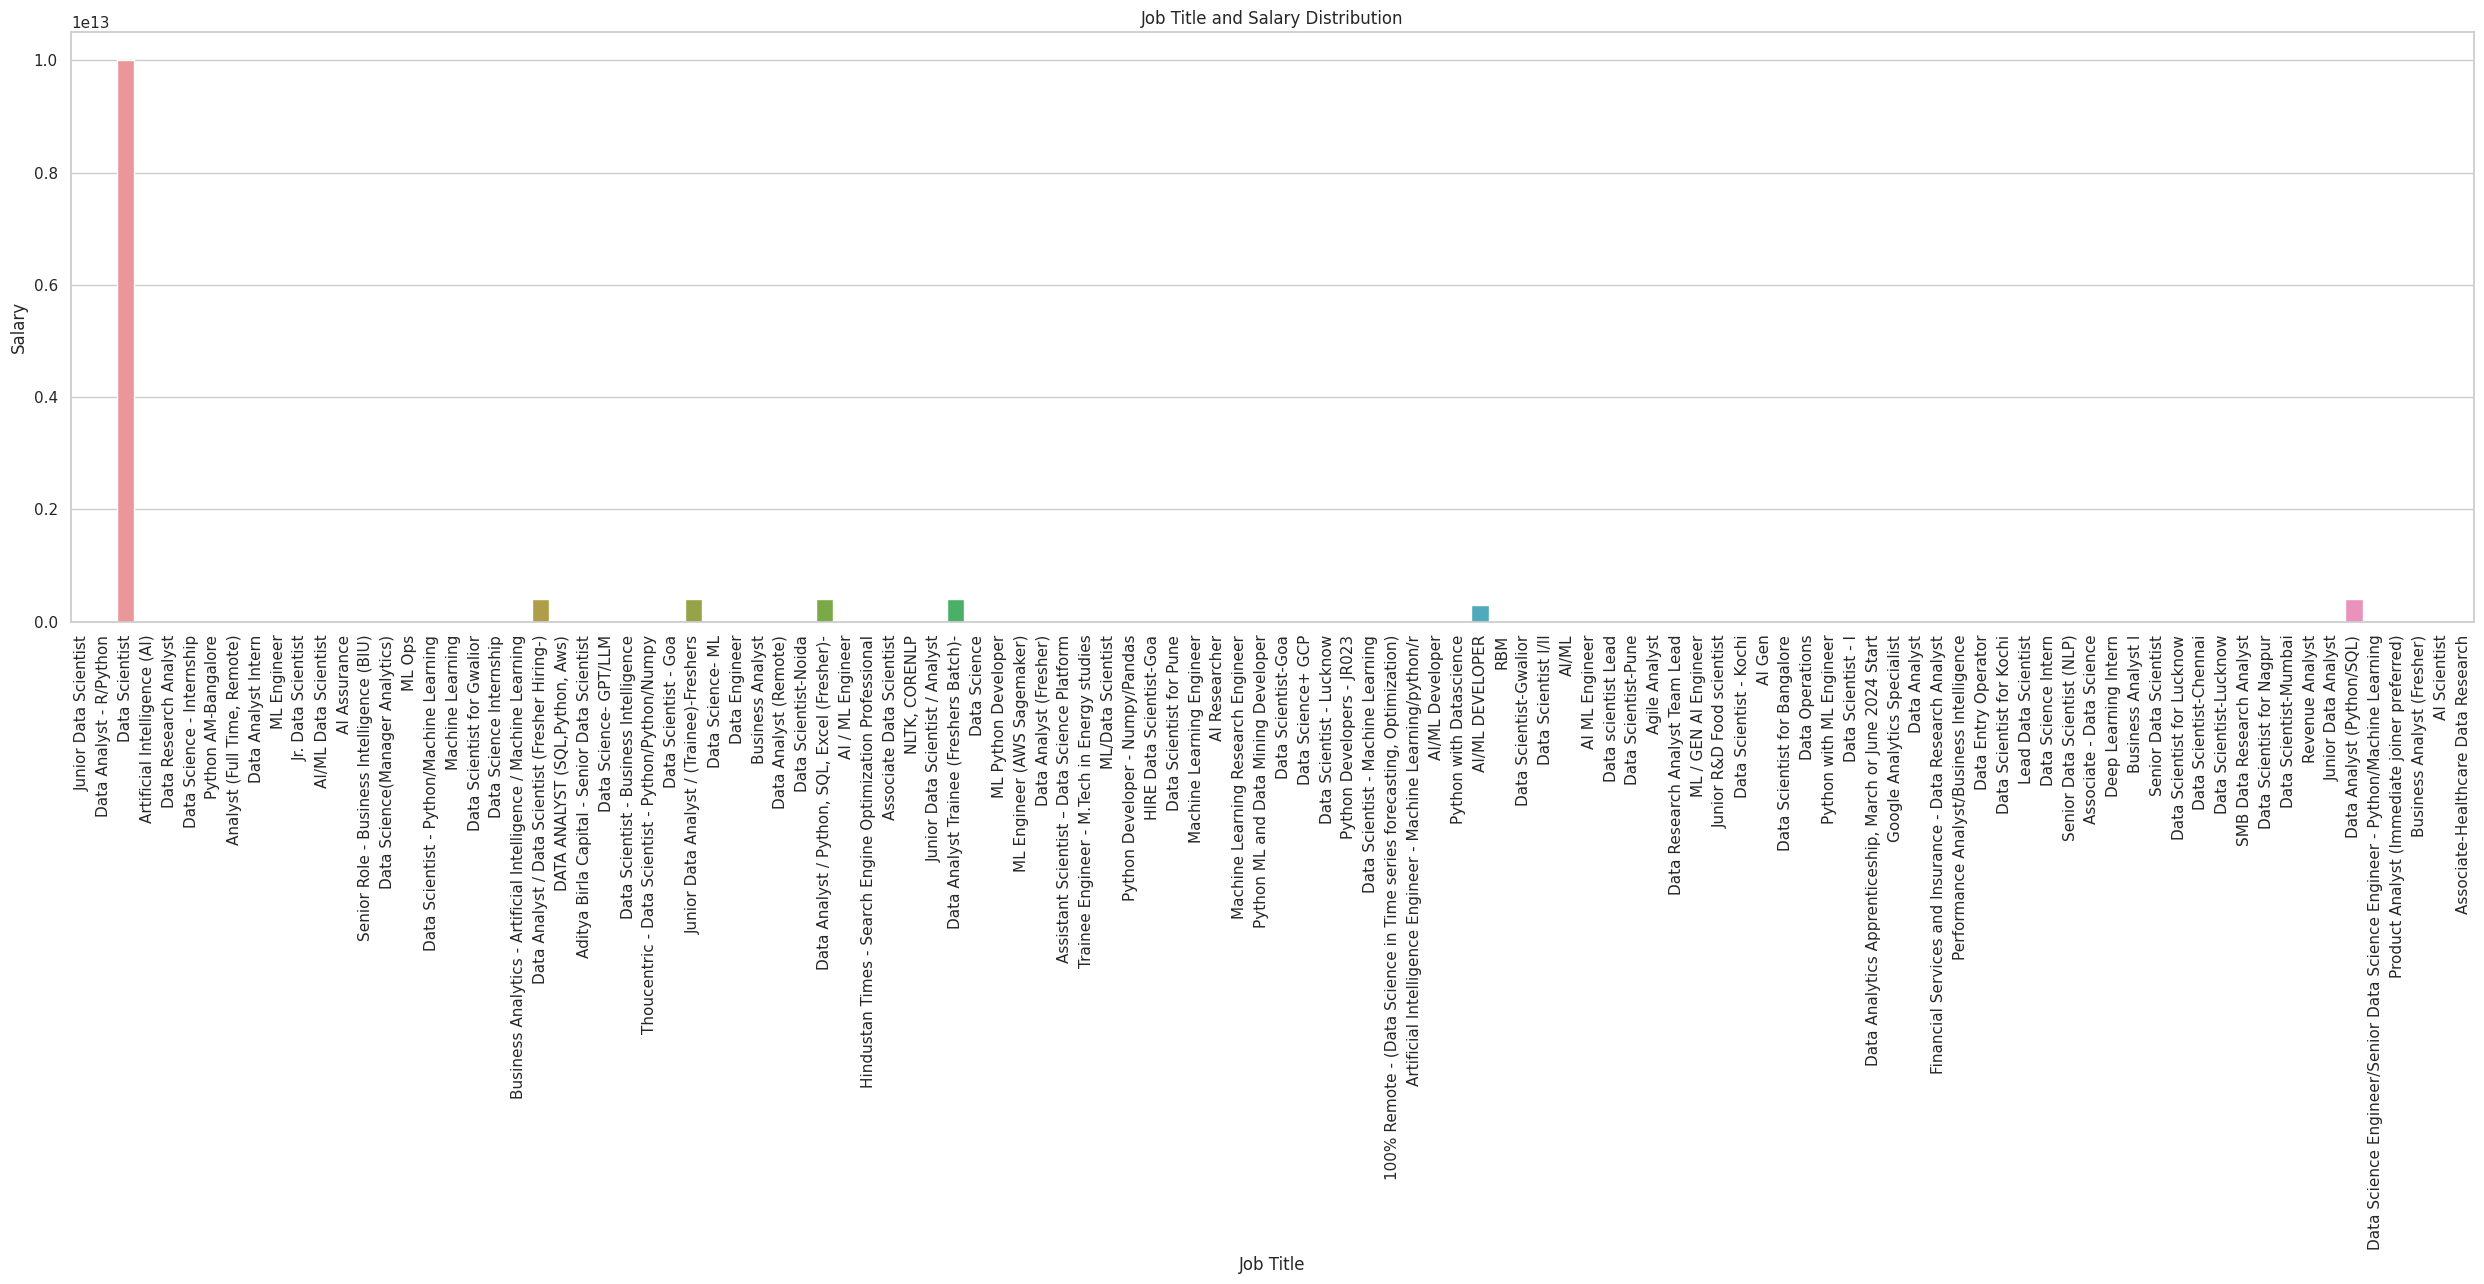

In [ ]:
# Create a bar chart for job titles and their corresponding salary ranges
plt.figure(figsize=(25, 13))
sns.barplot(x=column_cleaned['Job Title'], y=column_cleaned['Salary'], errorbar='sd')
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title('Job Title and Salary Distribution')
plt.tight_layout()
plt.show()

**Chart Type**:- Bar Type

 **INSIGHT:-** Job Title 'Data Scientist' is most prominent than the others job title.

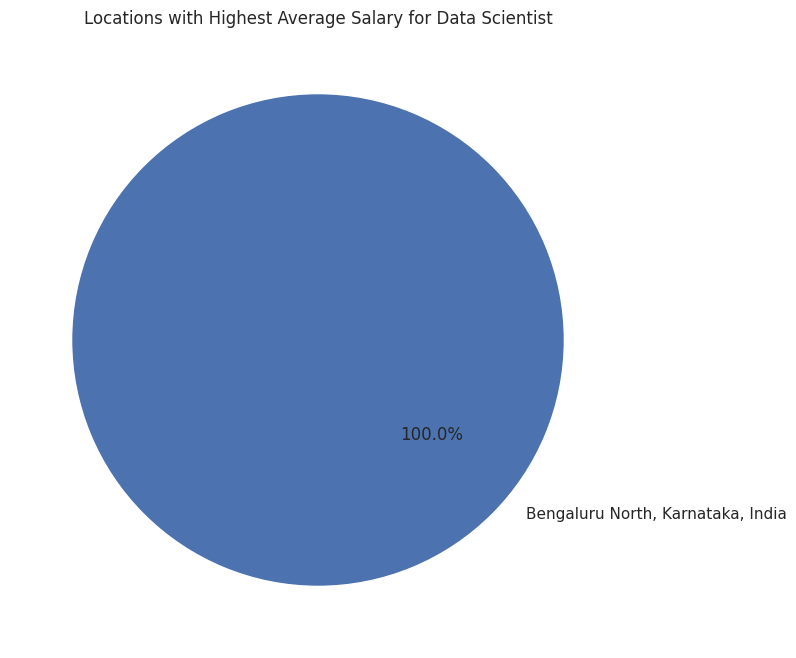

In [ ]:
#Change this to your desired job title
job_type = "Data Scientist"

# Filter the DataFrame for the specified job type
filtered_df = column_cleaned[column_cleaned['Job Title'] == job_type]

# Calculate the average salary for each location
average_salary_by_location = filtered_df.groupby('Location')['Salary'].mean()

# Drop locations with NaN (missing) values
average_salary_by_location = average_salary_by_location.dropna()

# Create a pie chart for the top locations with the highest average salary
plt.figure(figsize=(8, 8))
plt.pie(average_salary_by_location, labels=average_salary_by_location.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Locations with Highest Average Salary for {job_type}')
plt.show()

**Chart Type**:- Pie Chart

**INSIGHT:-** Bengaluru North, Karnatak offers higher average salary for 'Data Scientist' job.

# Conclusion

These measures will result in a valuable resource for both job seekers and employers, offering insights into industry dynamics and facilitating a more effective job search.